In [1]:
%load_ext autoreload
%autoreload 2

In [2]:


import numpy as np
import pandas as pd
from bib.cleaning import *
from bib.plot import *
from bib.rede import *
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

    

In [17]:
brasil = pd.read_csv("./input/Censo 2022 - Pirâmide etária - Brasil.csv",sep=';')
del brasil['Unnamed: 4']
del brasil['Unnamed: 5']
del brasil['Recorte Geográfico']
brasil['Total'] = brasil['População feminina(pessoas)'] + brasil['População masculina(pessoas)']
brasil

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),Total
0,100 anos ou mais,27244,10570,37814
1,95 a 99 anos,114859,50319,165178
2,90 a 94 anos,385388,194341,579729
3,85 a 89 anos,835554,493649,1329203
4,80 a 84 anos,1465178,1009852,2475030
5,75 a 79 anos,2189593,1657786,3847379
6,70 a 74 anos,3243186,2615350,5858536
7,65 a 69 anos,4288180,3588052,7876232
8,60 a 64 anos,5338555,4605834,9944389
9,55 a 59 anos,6149601,5419505,11569106


In [18]:
quartis = [0,20,30,50,70,10000]
brasil['Grupo de idade'] = [int(i.split(" ")[0]) for i in brasil['Grupo de idade']]
brasil

,Grupo de idade,População feminina(pessoas),População masculina(pessoas),Total
0,100,27244,10570,37814
1,95,114859,50319,165178
2,90,385388,194341,579729
3,85,835554,493649,1329203
4,80,1465178,1009852,2475030
5,75,2189593,1657786,3847379
6,70,3243186,2615350,5858536
7,65,4288180,3588052,7876232
8,60,5338555,4605834,9944389
9,55,6149601,5419505,11569106


In [19]:
soma = np.zeros(len(quartis))
for i in brasil[['Grupo de idade','Total']].values[::-1]:
    for j in range(len(quartis)):
        if(i[0]< quartis[j]):
            soma[j] += i[1]
            break

In [36]:
fig = go.Figure()

# Adiciona os dados ao gráfico de barras
fig.add_trace(go.Bar(
    x = [ f"Faixa etária {i+1}" for i in range(0,5) ],
    y=soma[1:]/np.sum(soma),      # Valores no eixo Y
    text = soma[1:]/np.sum(soma),
    texttemplate='%{text:.2%}',
    textposition='outside',
    marker=dict(
        line=dict(
            color='black',  # Cor do contorno das barras
            width=1.5       # Largura do contorno
        )
    ),
    name= 'Brasil'
))
s = np.unique(faixas,return_counts = True)[1]
fig.add_trace(go.Bar(
    x = [ f"Faixa etária {i+1}" for i in range(0,5) ],
    y=s/np.sum(s),      # Valores no eixo Y
    text = s/np.sum(s),
    texttemplate='%{text:.2%}',
    textposition='outside',
    marker=dict(
        line=dict(
            color='black',  # Cor do contorno das barras
            width=2.5       # Largura do contorno
        )
    ),
    name= 'POLYMOD'
))


# Configurações do layout
fig.update_layout(
    yaxis_title="Frequência",
    bargap=0.2  # Espaçamento entre as barras
)

fig.update_layout(
    height = 800,
    width=1200,  # Largura do gráfico em pixels
    #xaxis=dict(title='P',tickfont=dict(size=18)),
    template = "seaborn",
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(
        size=20,
    ),
    legend=dict(
        font=dict(
            size=30,
        )
    )
)
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=s, b=s))

# Exibe o gráfico
fig.show()
fig.write_image('./img/faixas_brasil_polymod.png')

In [ ]:
np.savetxt('./C/dados/pop_brasil.txt',soma[1:]/np.sum(soma),fmt = "%f") 

In [3]:
polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")
polymod_ = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_hh_common.csv")
polymod_ids = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_participant_common.csv")

contatos = polymod[['part_id','cont_id','cnt_age_exact','cnt_age_est_min','cnt_age_est_max']]
contatos = contatos.merge(polymod_ids[['part_id','part_age']], on='part_id', how='inner')


/tmp/ipykernel_65496/1874454666.py:1: DtypeWarning: Columns (6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  polymod = pd.read_csv("./input/POLYMOD/2008_Mossong_POLYMOD_contact_common.csv")


In [4]:
df = polymod[['phys_contact','duration_multi']]
df = df.dropna()

In [5]:
df.head()

,phys_contact,duration_multi
0,1.0,4.0
1,1.0,5.0
2,1.0,4.0
3,1.0,5.0
4,1.0,3.0


In [6]:
polymod

,part_id,cont_id,cnt_age_exact,cnt_age_est_min,cnt_age_est_max,cnt_gender,cnt_home,cnt_work,cnt_school,cnt_transport,cnt_leisure,cnt_otherplace,frequency_multi,phys_contact,duration_multi
0,1,101,42.0,42.0,NaN,F,True,False,False,False,False,False,1.0,1.0,4.0
1,1,102,9.0,9.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0
2,1,103,42.0,40.0,45.0,F,False,False,False,False,True,False,3.0,1.0,4.0
3,1,104,8.0,8.0,NaN,F,False,False,True,False,False,False,1.0,1.0,5.0
4,1,105,29.0,28.0,30.0,F,False,False,True,False,False,False,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97899,8001,800124,11.0,11.0,NaN,F,True,False,False,False,False,False,1.0,1.0,5.0
97900,8001,800125,3.0,3.0,NaN,M,True,False,False,False,False,False,1.0,1.0,5.0
97901,8001,800126,43.0,43.0,NaN,F,True,False,False,False,False,False,1.0,1.0,5.0
97902,8001,800127,33.0,33.0,NaN,F,False,False,False,False,False,True,4.0,1.0,3.0


In [7]:
merged_df = contatos.dropna(subset=['cnt_age_exact', 'cnt_age_est_min'], how='all')[['part_id','part_age','cnt_age_exact']]
quartis = [0,20,30,50,70,10000]
part = np.unique(merged_df['part_id'])

In [8]:
merged_df = transform_faixa(merged_df,"part_age",quartis)
merged_df = transform_faixa(merged_df,"cnt_age_exact",quartis)
polymod_ids = transform_faixa(polymod_ids,"part_age",quartis)

In [9]:
pivot_df = merged_df.pivot_table(index='part_id', columns='cnt_age_exactFaixas', aggfunc='size', fill_value=0)

In [10]:
faixas = polymod_ids[polymod_ids['part_id'].isin(part)]['part_ageFaixas'].values
contatos = pivot_df.values

In [11]:
connections = polymod[["part_id","cont_id","cnt_age_exact","duration_multi"]]
#connections = connections[connections['frequency_multi'] <3 ]
connections = pd.merge(polymod_ids[["part_id","part_age"]], connections, on='part_id', how='inner')
quartis = [0,20,30,50,70,10000]
connections = transform_faixa(connections,"part_age",quartis)
connections = transform_faixa(connections,"cnt_age_exact",quartis)
connections = connections[["part_id","part_ageFaixas","cnt_age_exactFaixas","duration_multi"]]

In [13]:
valores = np.array([2.5,10,75/2,150,300])
x = connections['duration_multi'].values.astype(int) - 1
duracao = np.array([valores[i]if(i < 10) else 1000000000  for i in x ])
connections['duracao'] = duracao
connections = connections[connections['duracao'] <1000000000 ]

/tmp/ipykernel_26962/3702329111.py:2: RuntimeWarning: invalid value encountered in cast
  x = connections['duration_multi'].values.astype(int) - 1


In [83]:
duracao = np.zeros((5,5))
N = np.zeros((5,5))
std = np.zeros((5,5))
for i in connections[['part_ageFaixas','cnt_age_exactFaixas','duracao']].values:
    duracao[int(i[0])][int(i[1])] += i[2]
    duracao[int(i[1])][int(i[0])] += i[2]
    std[int(i[0])][int(i[1])] += i[2]**2
    std[int(i[1])][int(i[0])] += i[2]**2
    N[int(i[0])][int(i[1])] += 1
    N[int(i[1])][int(i[0])] += 1
duracao = duracao/N
std = std/N
std = np.sqrt(std - duracao**2)

In [ ]:
np.savetxt("./C/dados/media.txt",duracao,fmt="%f")
np.savetxt("./C/dados/std.txt",std,fmt="%f")

In [15]:
np.unique(faixas,return_counts = True)[1]

array([2712,  870, 1717, 1615,  324])

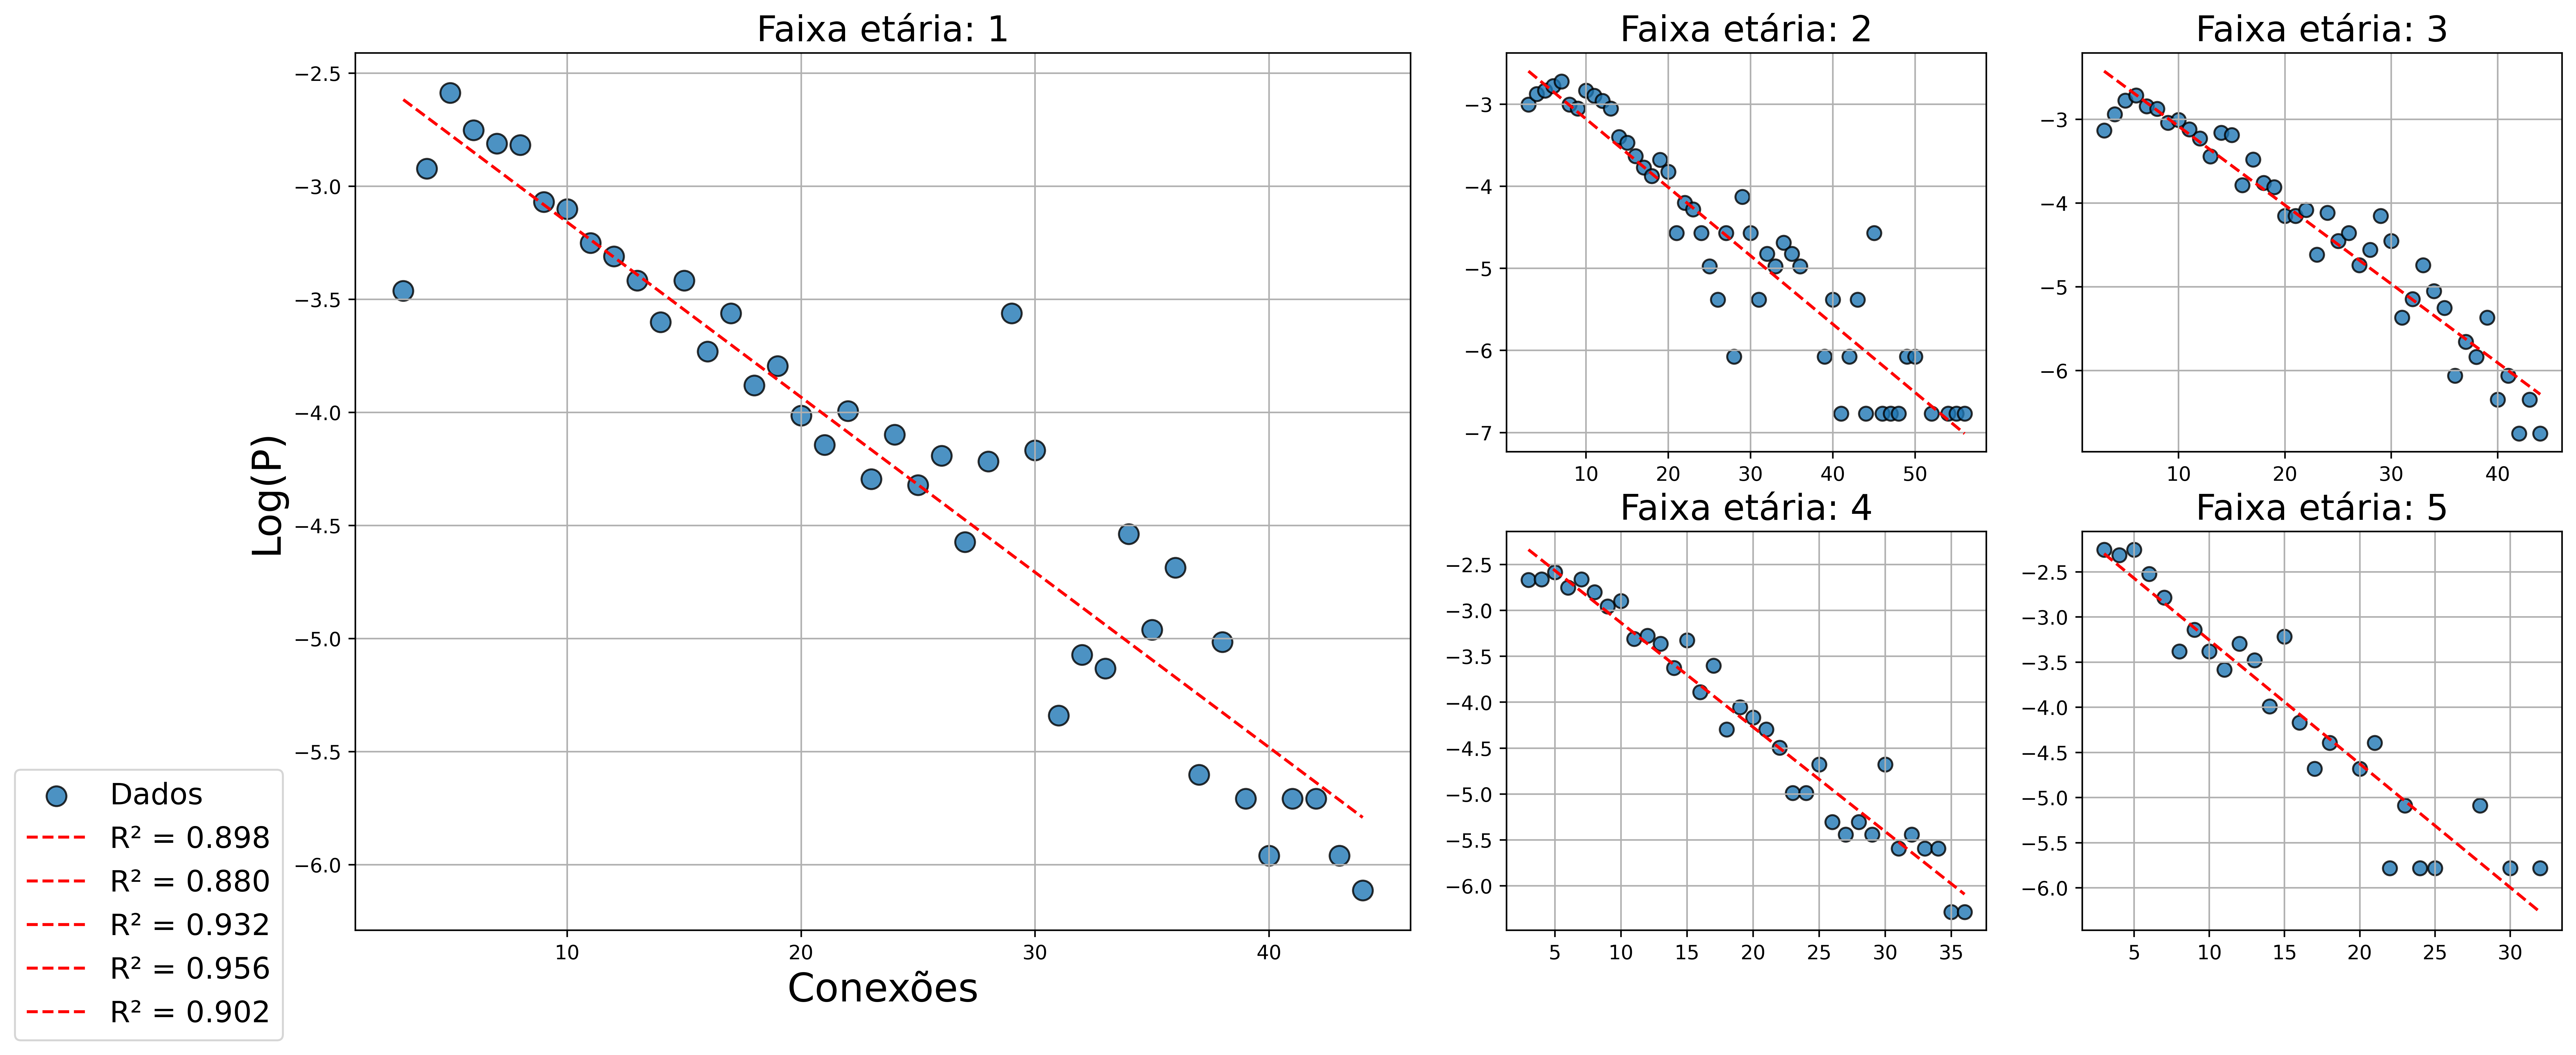

In [25]:
A,B,C,S = generate_distribution_byfaixas(contatos,faixas)

In [68]:


# Exemplo de matriz (você pode usar qualquer matriz que desejar)
matrix = np.flipud(B)  # Valores multiplicados para ficarem mais visíveis

# Criação do heatmap com rótulos
fig = go.Figure(data=go.Heatmap(
    z=matrix,
    colorscale='deep',  # Escolha uma paleta que mantenha o contraste com os números
    text=np.round(matrix, 2),  # Colocando os valores da matriz no texto
    texttemplate="%{text}",  # Mostrar o valor exato
    textfont={"size":22},  # Tamanho da fonte dos números
    zmin=np.min(B), zmax=np.max(B),  # Definir o intervalo de cores para 1 a 5
    hoverinfo='skip',  # Desativar informações ao passar o mouse
    showscale=False  # Remover a barra lateral (colorbar)
))

# Customização do layout para melhorar a delimitação e ajustar os títulos dos eixos
fig.update_layout(
    title_font=dict(size=20, color='black'),
    xaxis=dict(
        title_font=dict(size=24),  # Aumentar o tamanho do título do eixo X
        tickfont=dict(size=20),  # Aumentar o tamanho dos rótulos dos ticks no eixo X
        showgrid=False,  # Remover grid no fundo
        ticks='',
        tickvals=[0, 1, 2, 3, 4],  # Posicionamento dos ticks
        ticktext=[f'Faixa {i}' for i in range(1,6)], 
    ),
    yaxis=dict(
        title_font=dict(size=24),  # Aumentar o tamanho do título do eixo Y
        tickfont=dict(size=20),  # Aumentar o tamanho dos rótulos dos ticks no eixo Y
        showgrid=False,
        ticks='',
        tickvals=[0, 1, 2, 3, 4],  # Posicionamento dos ticks
        ticktext=[f'Faixa {6-i}' for i in range(1,6)], 
    ),
    plot_bgcolor='white',  # Fundo branco para melhor contraste
    width=800, height=800,  # Ajuste do tamanho do gráfico
    template="seaborn",  # Estilo de layout
    paper_bgcolor='rgba(0,0,0,0)',
)

# Ajustar margens do gráfico
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=s, b=s))
fig.write_image(f'./img/h.png')
# Exibir o gráfico
fig.show()

In [87]:
duracao = np.flipud(duracao)
std = np.flipud(std)

In [90]:


fig = make_subplots(
    rows=1, cols=2, 
    #subplot_titles=("Méida", "Desvio Padrão"),  # Títulos para cada heatmap
    shared_yaxes=True  # Compartilhar o eixo Y para alinhamento
)

# Primeiro heatmap para a matriz 'duracao'
heatmap1 = go.Heatmap(
    z=duracao,
    colorscale='deep',  # Paleta de cores
    text=np.round(duracao, 2),  # Exibir valores arredondados
    texttemplate="%{text}",  # Mostrar o valor exato
    textfont={"size":22},  # Tamanho da fonte dos números
    zmin=np.min(duracao), zmax=np.max(duracao),  # Definir intervalo de cores
    hoverinfo='skip',  # Desativar informações ao passar o mouse
    showscale=False  # Remover a barra lateral (colorbar)
)

# Segundo heatmap para a matriz 'std'
heatmap2 = go.Heatmap(
    z=std,
    colorscale='deep',  # Mesma paleta de cores para consistência
    text=np.round(std, 2),  # Exibir valores arredondados
    texttemplate="%{text}",  # Mostrar o valor exato
    textfont={"size":22},  # Tamanho da fonte dos números
    zmin=np.min(std), zmax=np.max(std),  # Definir intervalo de cores
    hoverinfo='skip',  # Desativar informações ao passar o mouse
    showscale=False  # Remover a barra lateral (colorbar)
)

# Adicionar os heatmaps aos subplots
fig.add_trace(heatmap1, row=1, col=1)
fig.add_trace(heatmap2, row=1, col=2)
fig.update_layout(
    title_font=dict(size=20, color='black'),
    # Atualizar os eixos X e Y para cada subplot individualmente
    xaxis1=dict(
        title_font=dict(size=24),  # Aumentar o tamanho do título do eixo X
        tickfont=dict(size=20),  # Aumentar o tamanho dos rótulos dos ticks no eixo X
        showgrid=False,  # Remover grid no fundo
        ticks='',
        tickvals=[0, 1, 2, 3, 4],  # Posicionamento dos ticks
        ticktext=[f'Faixa {i}' for i in range(1, 6)], 
    ),
    xaxis2=dict(
        title_font=dict(size=24),  # Aumentar o tamanho do título do eixo X
        tickfont=dict(size=20),  # Aumentar o tamanho dos rótulos dos ticks no eixo X
        showgrid=False,  # Remover grid no fundo
        ticks='',
        tickvals=[0, 1, 2, 3, 4],  # Posicionamento dos ticks
        ticktext=[f'Faixa {i}' for i in range(1, 6)], 
    ),
    yaxis=dict(  # Eixo Y compartilhado
        title='Faixa Etária',
        title_font=dict(size=24),  # Aumentar o tamanho do título do eixo Y
        tickfont=dict(size=20),  # Aumentar o tamanho dos rótulos dos ticks no eixo Y
        showgrid=False,
        ticks='',
        tickvals=[0, 1, 2, 3, 4],  # Posicionamento dos ticks
        ticktext=[f'Faixa {6-i}' for i in range(1, 6)], 
    ),
    plot_bgcolor='white',  # Fundo branco para melhor contraste
    width=1200, height=600,  # Ajuste do tamanho do gráfico para caber os dois heatmaps
    template="seaborn",  # Estilo de layout
    paper_bgcolor='rgba(0,0,0,0)',
)

# Customização do layout

# Ajustar margens do gráfico
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=50, b=s))
fig.write_image(f'./img/media_std.png')
# Exibir o gráfico
fig.show()

In [18]:
N = np.unique(faixas,return_counts=True)[1]
N = N/np.sum(N)

In [258]:
max = 59
for faixa in range(5):
    x,grau = np.unique(np.sum(contatos[faixas == faixa],axis = 1),return_counts= True)
    grau = grau/np.sum(grau)
    k = np.array([grau[x == i][0] if(len(grau[x == i]) != 0) else 0 for i in np.arange(max+1)])
    zeros = k == 0
    k = np.cumsum(k)
    k[zeros] = -1
    k[np.argmax(k)] = 1
    np.savetxt(f"./C/dados/distribution_{faixa}.txt",k,fmt = "%f")

In [46]:
#dist = np.zeros((5,5))
dist = np.ones((5,5))*0.2

In [47]:
np.savetxt("./C/dados/multi_probability_density.txt",dist,fmt = '%f')

In [281]:
c = np.loadtxt("./C/conexoes.txt")

In [282]:
faixas_ = c.T[0]
unicas = np.unique(faixas_)
c = c[:,1:]

In [283]:
faixa = 0
x,y = np.unique(contatos[faixas == faixa][:,0],return_counts=True)
x_,y_ = np.unique(c[faixas_ == faixa][:,0],return_counts=True)
y = y/np.sum(y)
y_ = y_/np.sum(y_)
fig = go.Figure()

# Adicionar o primeiro gráfico de barras
fig.add_trace(go.Bar(x=x, y=y, name='Dados'))

# Adicionar o segundo gráfico de barras
fig.add_trace(go.Bar(x=x_, y=y_, name='Algoritmo'))

# Atualizar o layout do gráfico
fig.update_layout(title='Dois Gráficos de Barras na Mesma Figura',
                  xaxis_title='Categoria',
                  yaxis_title='Contagem',
                  barmode='group')

# Exibir o gráfico
fig.show()

In [10]:
create_multi_bar(polymod)

In [21]:
df_merged = pd.merge(polymod_ids,polymod, on='part_id')

# Agora, o DataFrame 'df_merged' terá as colunas 'id', 'valor' e 'novo_id'
# Se quiser manter apenas 'novo_id' e 'valor', pode descartar a coluna 'id'
df_merged = df_merged.drop('part_id', axis=1)

In [23]:
polymod_

,hh_id,country,hh_size
0,Mo08HH1,IT,3
1,Mo08HH2,IT,3
2,Mo08HH3,IT,3
3,Mo08HH4,IT,3
4,Mo08HH5,IT,4
...,...,...,...
7285,Mo08HH8000,BE,3
7286,Mo08HH8001,BE,6
7287,Mo08HH50036,BE,1
7288,Mo08HH50037,BE,1


In [17]:
a = get_all_data()
a

,Contato_idade,id,Idade
0,24.0,Belgica2006_0,22.0
1,22.0,Belgica2006_0,22.0
2,22.0,Belgica2006_0,22.0
3,48.0,Belgica2006_0,22.0
4,25.0,Belgica2006_0,22.0
...,...,...,...
215650,9.0,Zimbabwe_1244,7.0
215651,9.0,Zimbabwe_1244,7.0
215652,53.0,Zimbabwe_1244,7.0
215653,29.0,Zimbabwe_1244,7.0


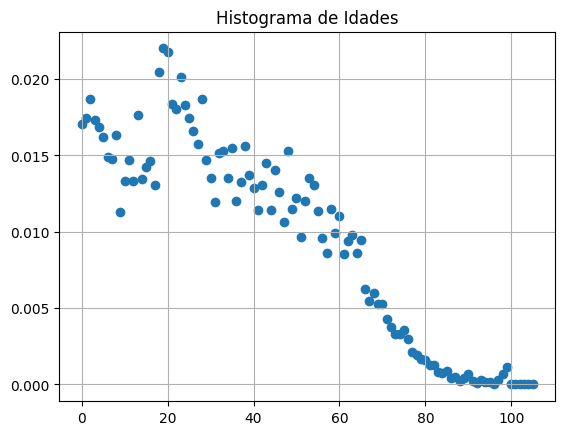

In [5]:
plot_idades(a)

In [4]:
quartis = [0,20,30,50,70,10000]

In [41]:
a = transform_faixa(a,"Idade",quartis)
a = transform_faixa(a,"Contato_idade",quartis)

In [42]:
polymod = [i for i in a['id'].unique() if('POLYMOD' in i)]
polymod = a[a['id'].isin(polymod)]

In [47]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


In [48]:
contagem = pd.crosstab(polymod['id'], polymod['Contato_idadeFaixas']).values
faixas = polymod.drop_duplicates(subset='id')['IdadeFaixas'].values

In [49]:
contagem.shape

(7189, 5)

In [75]:
x,y = np.unique(np.sum(contagem,axis = 1)[faixas == 0],return_counts=True)
print(y)
y = y/np.sum(y)
l = np.mean(np.sum(contagem,axis = 1)[faixas == 0])

[ 62  82 124 167 214 174 166 154 120 145 123 110  94  85  95  73  78  55
  57  43  41  37  30  28  22  17  23  19  70  31   9  16  17  16  10  13
   2   6   8   7   4   6   5   3  43   2   1   1   1   1   1   4   1]


In [60]:
def LR(x,y):
    reg = LinearRegression()
    reg.fit(x.reshape(-1,1),y)
    R2 = r2_score(reg.predict(x.reshape(-1,1)),y)
    return R2,reg.coef_[0]

In [40]:
np.sum(contagem[faixas == 4],axis = 1)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7189 but corresponding boolean dimension is 7238

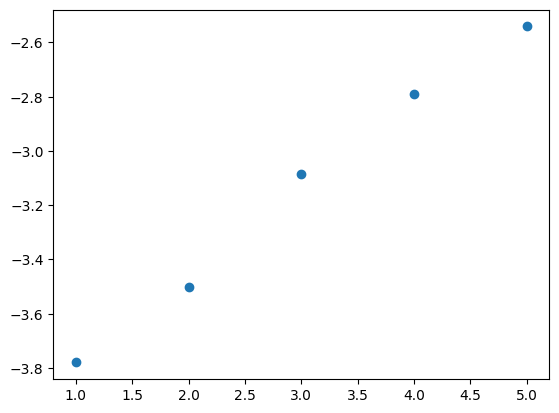

In [49]:
#plt.bar(x,[np.exp(-l)*l**i/np.math.factorial(i) for i in x])

In [188]:
modelo_k = np.loadtxt("./C/output/modelo/k_idades_0.50.txt").astype(int)

In [254]:
c = np.loadtxt("./C/conexoes3.txt")

In [224]:
np.sum(contatos,axis = 1)[np.sum(contatos,axis = 1) == 0]

array([], dtype=int64)

In [255]:
compara(c,contatos,faixas)

As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.
As amostras provavelmente vêm da mesma distribuição 1.0.


In [40]:
matrix_k = np.loadtxt("./C/matrix_k.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)

    M = M /  kzinho[:, np.newaxis]
    result.append(np.mean(M,axis=0))

In [8]:
print(f"Grau médio: {np.mean(np.sum(contagem,axis = 1))}")
for f in range(5):
    print(f"Grau médio da faixa etária {f+1}: {np.mean(np.sum(contagem[faixas == f],axis = 1))}")

Grau médio: 13.531506468215328
Grau médio da faixa etária 1: 13.002945508100147
Grau médio da faixa etária 2: 14.098737083811711
Grau médio da faixa etária 3: 13.462165308498253
Grau médio da faixa etária 4: 14.026576019777503
Grau médio da faixa etária 5: 14.507518796992482


In [32]:
resultado = np.loadtxt("./C/test.txt")
faixas_ = np.loadtxt("./C/test2.txt")

In [13]:
contagem = pd.crosstab(a['id'], a['Contato_idadeFaixas']).values
faixas = a.drop_duplicates(subset='id')['IdadeFaixas'].values

In [144]:
data = pd.read_csv('./output/participantes.csv')
contatos01 = pd.read_csv('./output/contatos_01.csv')

In [40]:
vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]

/tmp/ipykernel_19787/3761567207.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  vetor[vetor != np.arange(len(vetor))[np.sum(vetor,axis = 1) == 0]]


array([[[18.,  8., 23.,  7.,  2.],
        [21.,  7., 20.,  8.,  2.],
        [12., 12., 22.,  7.,  2.],
        ...,
        [ 6.,  0.,  1.,  0.,  0.],
        [11.,  0.,  2.,  0.,  0.],
        [ 2.,  0.,  0.,  0.,  0.]]])

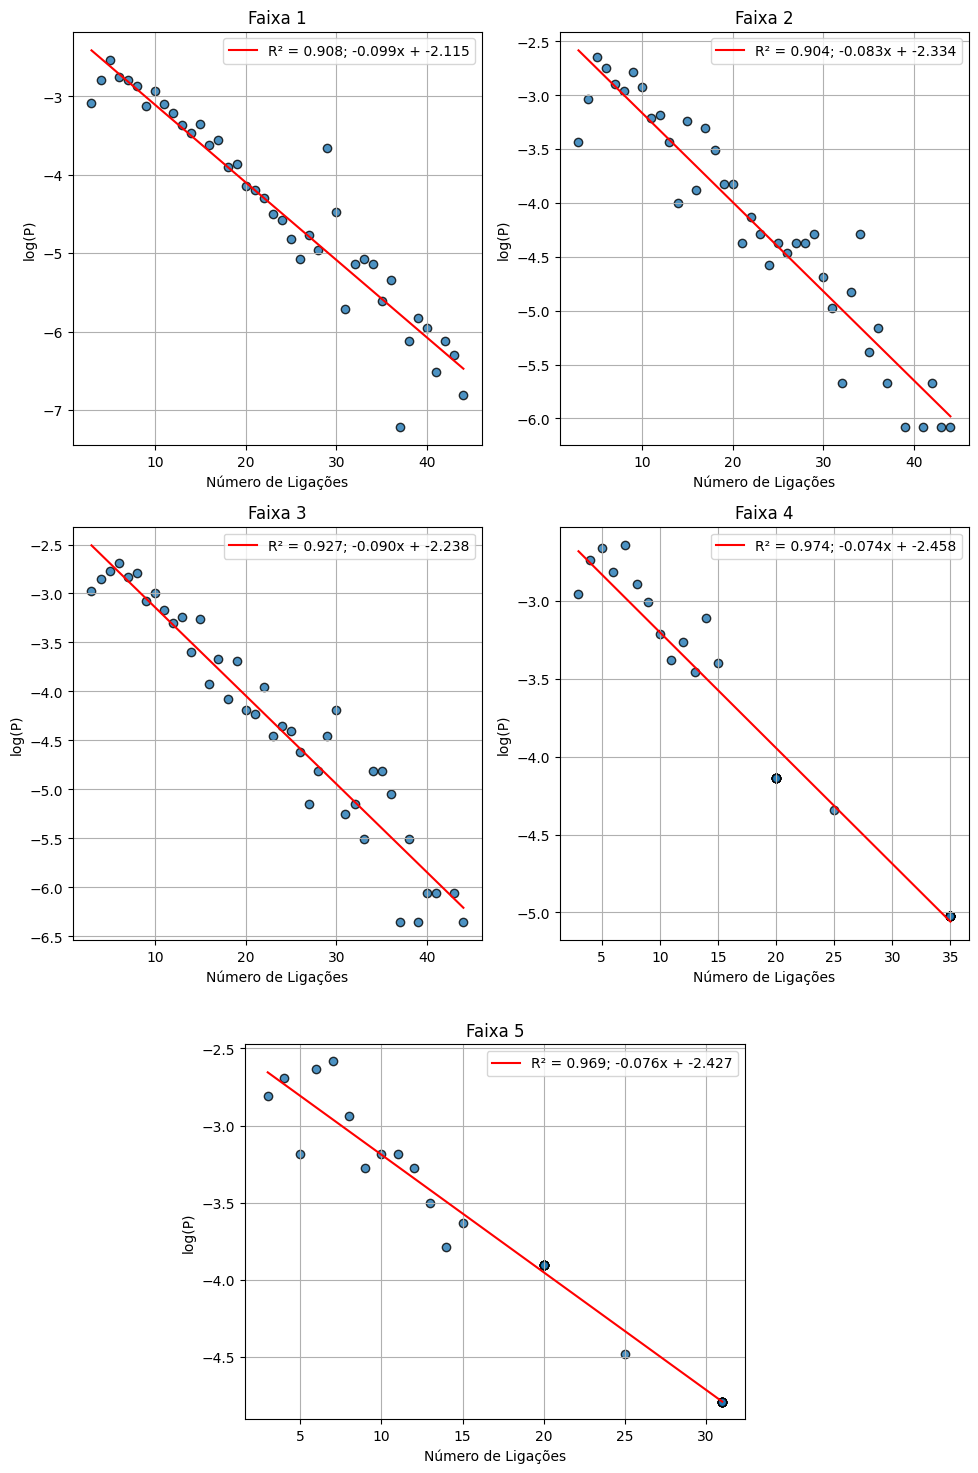

In [8]:
A,B,C,S = generate_distribution_byfaixas(contagem,faixas)

In [22]:
B

[array([0.49026359, 0.10213307, 0.28503069, 0.10115465, 0.021418  ]),
 array([0.14148185, 0.37249127, 0.31282774, 0.15004927, 0.02314987]),
 array([0.19200476, 0.1355499 , 0.45977649, 0.17344075, 0.0392281 ]),
 array([0.10613082, 0.12467085, 0.33282646, 0.36179938, 0.07457249]),
 array([0.13099369, 0.08142235, 0.30362829, 0.28928784, 0.19466783])]

In [24]:
heat_map(np.array(B).T,'')

In [42]:
matrix_k = np.loadtxt("./C/output/modelo/save/matrix_0.00.txt")
matrix_k = matrix_k[:,:].astype(int)

In [43]:
matrix_k

array([[ 0,  1,  0,  3,  1,  0],
       [ 0,  2,  4, 15,  6,  3],
       [ 0,  9,  5, 10,  2,  4],
       ...,
       [ 3,  5,  0,  0,  0,  0],
       [ 3,  3,  0,  0,  0,  0],
       [ 3,  3,  0,  0,  0,  0]])

In [44]:
#matrix_k = np.loadtxt("./C/output/modelo/resultados_0.25.txt").astype(int)
result = []
for i in range(5):
    M = matrix_k[matrix_k.T[0] == i][:,1:]
    kzinho = np.sum(M,axis = 1)
    M = M[kzinho != 0] /  kzinho[kzinho != 0][:, np.newaxis]
    result.append(np.mean(M,axis=0))
result = np.array(result)
result = result - B
heat_map(result,np.array(range(1,6)),np.array(range(1,6)),'modelo')

In [29]:
fig = go.Figure()
x,y = np.unique(polymod['IdadeFaixas'],return_counts=True)
y = y/np.sum(y)
fig.add_trace(go.Bar(
    x=[f"Faixa {i+1}" for i in x],
    y=y,
    text=np.round(y,2),  # Texto exibido no hover
    textposition='outside',  # Posição do texto (pode ser 'inside', 'outside', 'auto', 'none')
    marker=dict(line=dict(color='black', width=1),color = px.colors.qualitative.Prism[1])
))
# Adicione título e rótulos aos eixos
fig.update_layout(
    width = 800,
    height = 600,
    yaxis=dict(title='Frequência', tickfont=dict(size=15)),
    xaxis=dict(title='Valores', tickfont=dict(size=15)),
    font=dict(
        #family="Courier New, monospace",
        size=15,
        #color="RebeccaPurple"
    ),
    template = 'seaborn',
    paper_bgcolor='rgba(0,0,0,0)', 
)
s = 20
fig.update_layout(margin=dict(l=s, r=s, t=s, b=s))

# Exiba o gráfico
fig.show()
fig.write_image("./img/faixas_polymod.png")

In [38]:
polymod

,Contato_idade,id,Idade,IdadeFaixas,Contato_idadeFaixas
58662,42.0,POLYMOD_0,8.0,0,2
58663,9.0,POLYMOD_0,8.0,0,0
58664,42.0,POLYMOD_0,8.0,0,2
58665,8.0,POLYMOD_0,8.0,0,0
58666,29.0,POLYMOD_0,8.0,0,1
...,...,...,...,...,...
156561,11.0,POLYMOD_7286,14.0,0,0
156562,3.0,POLYMOD_7286,14.0,0,0
156563,43.0,POLYMOD_7286,14.0,0,2
156564,33.0,POLYMOD_7286,14.0,0,2


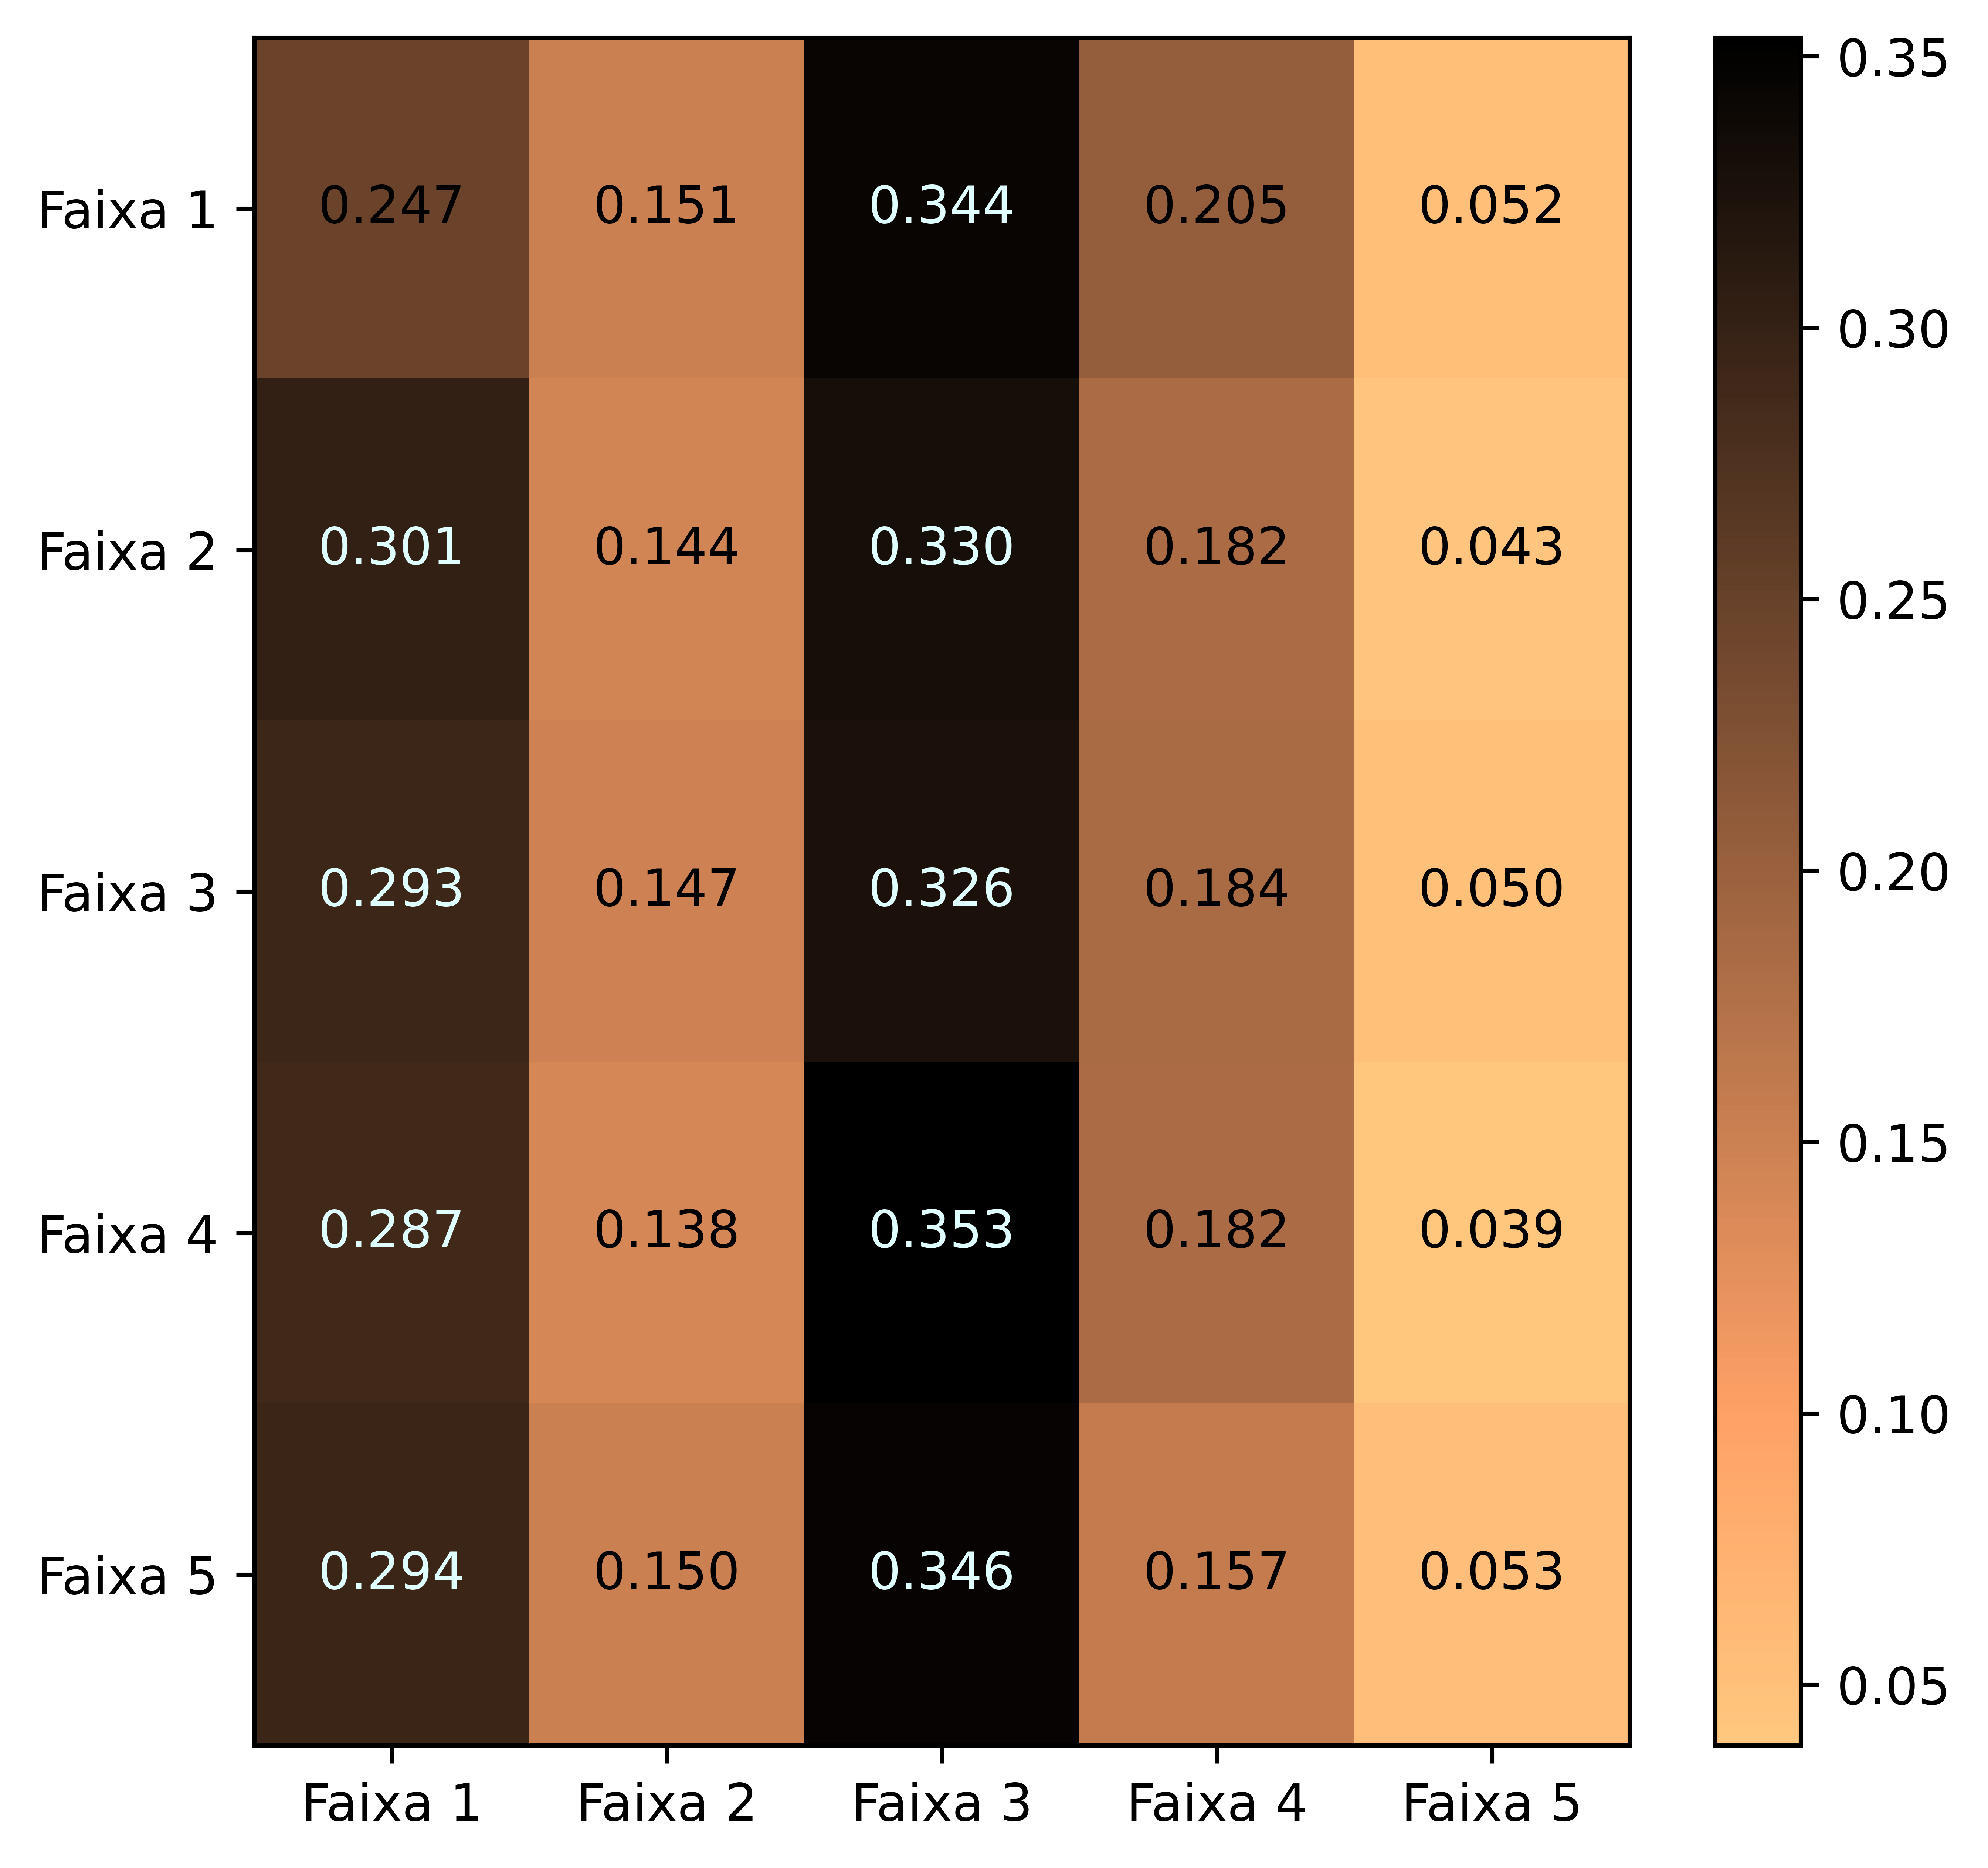

In [69]:
B = np.array(B)
plt.figure(figsize=(6,6),dpi = 1000)
plt.imshow(B, cmap='copper_r', aspect='auto')
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        plt.annotate(f'{B[i, j]:.3f}', xy=(j, i), ha='center', va='center', color='lightcyan' if(B[i, j] > 0.25) else "black")
# Configurações do heatmap
x_labels = [f"Faixa {i+1}"for i in range(5)]
y_labels = [f"Faixa {i+1}"for i in range(5)]
plt.xticks(np.arange(B.shape[1]), x_labels)
plt.yticks(np.arange(B.shape[0]), y_labels)
plt.colorbar()  # Barra de cores indicando os valores
#plt.title('Heatmap Example')
plt.savefig("./img/heat.png")
# Exibir o heatmap
plt.show()

In [12]:
vetor = np.loadtxt("./C/test.txt")
faixa_ = np.loadtxt("./C/test2.txt",dtype=int)

In [15]:
print(f"Grau médio dos dados: {np.mean(np.sum(vetor,axis = 1))}")
for i in range(5):
    print(np.sum(contagem[faixas == i].T,axis = 1)/np.sum(np.sum(contagem[faixas == i].T,axis = 1)))

Grau médio dos dados: 13.464059059707292
[0.29771209 0.15052667 0.33562691 0.17518972 0.04094461]
[0.35855049 0.13868078 0.31490228 0.15081433 0.03705212]
[0.37348668 0.13827395 0.30140955 0.15046697 0.03636285]
[0.37149152 0.12941176 0.31777925 0.14611148 0.03520599]
[0.38118684 0.13708215 0.30707437 0.13397253 0.04068412]


In [50]:
for i in range(5):
    print(np.sum(vetor[faixa_ == i].T,axis = 1)/np.sum(np.sum(vetor[faixa_ == i].T,axis = 1)))

[0.25003844 0.14827003 0.34224204 0.20805782 0.05139167]
[0.33518737 0.13390809 0.31669332 0.17082667 0.04338455]
[0.33351316 0.13651621 0.30504106 0.18120242 0.04372715]
[0.35495042 0.12891547 0.31722546 0.164017   0.03489165]
[0.36067343 0.13468595 0.31491474 0.14353551 0.04619037]


In [80]:
np.savetxt("./C/dados/lambda.txt",-np.array(A),fmt = "%f")
np.savetxt("./C/dados/multi_probability.txt",np.array(B),fmt = "%f")
np.savetxt("./C/dados/multi_constant.txt",np.exp(np.array(C)),fmt = "%f")